In [1]:
# ██████╗  ██████╗  ███╗   ██╗ ███████╗ ██╗  ██████╗  ██╗   ██╗ ██████╗   █████╗  ████████╗ ██╗  ██████╗  ███╗   ██╗ 
#██╔════╝ ██╔═══██╗ ████╗  ██║ ██╔════╝ ██║ ██╔════╝  ██║   ██║ ██╔══██╗ ██╔══██╗ ╚══██╔══╝ ██║ ██╔═══██╗ ████╗  ██║ 
#██║      ██║   ██║ ██╔██╗ ██║ █████╗   ██║ ██║  ███╗ ██║   ██║ ██████╔╝ ███████║    ██║    ██║ ██║   ██║ ██╔██╗ ██║ 
#██║      ██║   ██║ ██║╚██╗██║ ██╔══╝   ██║ ██║   ██║ ██║   ██║ ██╔══██╗ ██╔══██║    ██║    ██║ ██║   ██║ ██║╚██╗██║ 
#╚██████╗ ╚██████╔╝ ██║ ╚████║ ██║      ██║ ╚██████╔╝ ╚██████╔╝ ██║  ██║ ██║  ██║    ██║    ██║ ╚██████╔╝ ██║ ╚████║ 
# ╚═════╝  ╚═════╝  ╚═╝  ╚═══╝ ╚═╝      ╚═╝  ╚═════╝   ╚═════╝  ╚═╝  ╚═╝ ╚═╝  ╚═╝    ╚═╝    ╚═╝  ╚═════╝  ╚═╝  ╚═══╝ 
# global variables that are chagned often

#█▀▀ █▀▀ █▄ █ █▀▀ █▀█ ▄▀█ █   
#█▄█ ██▄ █ ▀█ ██▄ █▀▄ █▀█ █▄▄ 
#
#variable for skipping all the plotting code for debugging processing
plotting = True

#chose while taxi types to be processed
process_ywl = True
process_grn = True
process_fhv = True
process_hvf = False   #setting this to true adds 24hr processing

#limits data size and processes to be quicker (for testing only) 
testing = False
start_month = 3        #testing var default 2
number_of_months = 5   #testing var default 11
start_day = 60         #testing var default 32ish
number_of_days = 100     #testing var default 366


#█▀▄ ▄▀█ ▀█▀ ▄▀█    █▀▄ █ █▀█ 
#█▄▀ █▀█  █  █▀█    █▄▀ █ █▀▄ 
#

#main data directory
data_dir = "/mnt/e/2021/Applied Data Science/Project 1/Data/"

#intermediate file names
processed_data_file = "_processed_data_"
tally_s1_file = "taxi_data_tallyed_s1.csv"
tally_s2_file = "taxi_data_tallyed_s2.csv"

In [2]:
#setting up libs

import numpy as np
from scipy.stats import entropy
from math import e

from collections import OrderedDict

import random as random
np.random.seed(1)
from pprint import pprint

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.show() 
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.show() 

from scipy.stats import mode, chi2_contingency, pearsonr 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import datasets
from sklearn import svm

import warnings

warnings.filterwarnings("ignore")

In [3]:
# ██████╗  ██╗       ██████╗  ██████╗   █████╗  ██╗         ██╗   ██╗  █████╗  ██████╗  ███████╗ 
#██╔════╝  ██║      ██╔═══██╗ ██╔══██╗ ██╔══██╗ ██║         ██║   ██║ ██╔══██╗ ██╔══██╗ ██╔════╝ 
#██║  ███╗ ██║      ██║   ██║ ██████╔╝ ███████║ ██║         ██║   ██║ ███████║ ██████╔╝ ███████╗ 
#██║   ██║ ██║      ██║   ██║ ██╔══██╗ ██╔══██║ ██║         ╚██╗ ██╔╝ ██╔══██║ ██╔══██╗ ╚════██║ 
#╚██████╔╝ ███████╗ ╚██████╔╝ ██████╔╝ ██║  ██║ ███████╗     ╚████╔╝  ██║  ██║ ██║  ██║ ███████║ 
# ╚═════╝  ╚══════╝  ╚═════╝  ╚═════╝  ╚═╝  ╚═╝ ╚══════╝      ╚═══╝   ╚═╝  ╚═╝ ╚═╝  ╚═╝ ╚══════╝ 
# v2.1.0
# global variabels which can be tweeked

#█    ▀  █▀▀▄ █▀▀█ █▀▀█ █▀▀█ █  █ █▀▀ 
#█   ▀█▀ █▀▀▄ █▄▄▀ █▄▄█ █▄▄▀ █▄▄█ ▀▀█ 
#▀▀▀ ▀▀▀ ▀▀▀  ▀ ▀▀ ▀  ▀ ▀ ▀▀ ▄▄▄█ ▀▀▀ 
# imporint libarys used throughout

import time
import datetime

import pandas as pd
from numpy import log, sqrt
import seaborn as sns
import matplotlib.pyplot as plt

import os.path
from os.path import getsize
from urllib.request import urlretrieve

from pyspark.sql.functions import rand 
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

import warnings

#variable for skipping all the plotting code for debugging processing
start_time = time.perf_counter()
start_time_og = time.perf_counter()


#▀█▀ ▄▀█ ▀▄▀ █    █▀▄ ▄▀█ ▀█▀ ▄▀█ 
# █  █▀█ █ █ █    █▄▀ █▀█  █  █▀█ 
#

#file location
file_base = "_tripdata_"

#indexs for each of the main data set types
ywl_i = 0 
grn_i = 1
fhv_i = 2
hvf_i = 3

#used to identify which taxis to process
process_taxi = [process_ywl, process_grn, process_fhv, process_hvf]

#names related to each cab type in order
taxi_file_names = ["yellow","green","fhv","fhvhv"]
full_names = ["yellow cabs", "green cabs", "for higher vheciles", "for higher high volume"]

#column names for each cab type in order
column_names = [
    ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
    ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
    ['dispatching_base_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag'],
    ['hvfhs_license_num', 'dispatching_base_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag']
]

#2018 fhv files which was giving me trouble so added this schema for it
bad_fhv_schema = [2, 2018, ['Pickup_DateTime','DropOff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag','dispatching_base_number']]


#aliases for pickup time and dropoff time
pickup_time = ['tpep_pickup_datetime','lpep_pickup_datetime','pickup_datetime','pickup_datetime','Pickup_DateTime']
dropoff_time = ['tpep_dropoff_datetime','lpep_dropoff_datetime','dropoff_datetime','dropoff_datetime','DropOff_datetime']

#irrelavent collumns that can be dropped
irrelavent_columns = ['dispatching_base_number','DOtime','hvfhs_license_num','dispatching_base_num','VendorID','store_and_fwd_flag','extra','MTA_tax','improvement_surcharge','tip_amount','tolls_amount', 'ehail_fee', 'improvement_surcharge', 'congestion_surcharge']


#▀█▀ ▄▀█ ▀▄▀ █    █   █▀█ █▀▀ ▄▀█ ▀█▀ █ █▀█ █▄ █ █▀ 
# █  █▀█ █ █ █    █▄▄ █▄█ █▄▄ █▀█  █  █ █▄█ █ ▀█ ▄█ 
#

#location processing variables
#locations that will be removed as considered invalid
bad_locations = [1,132,138,264,265]

#location of the location id file
location_file = "taxi+_zone_lookup.csv"

#list of boroughs names as in the location file
boroughs_locations = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island","EWR","Unknown"]



#█▀▄ █▀█ █ █ █ █▄ █ █   █▀█ ▄▀█ █▀▄ 
#█▄▀ █▄█ ▀▄▀▄▀ █ ▀█ █▄▄ █▄█ █▀█ █▄▀ 
#

#download directory 
download_dir = data_dir

#taxi data base url
taxi_url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/"

#covid cases
covid_url = "https://data.cityofnewyork.us/api/views/rc75-m7u3/rows.csv?accessType=DOWNLOAD"
    
#location data
location_url = "https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv"

#█▀▄ ▄▀█ ▀█▀ █▀▀    █▀▄ █▀▀ █▀▀ █▀ 
#█▄▀ █▀█  █  ██▄    █▄▀ ██▄ █▀  ▄█ 
#
months_in_year = 12

#years of data used
years = [2019, 2020]

#feb 2019 was when fhvhv file started
fhvhv_started = [2,2019] 

#late feb 2020 was when the first case of covid was observed in NYC
covid_started = [2,2020] 

#preprocessing arrays

#hours each day to seperate each count
day_time_breakdown = [0,6,12,18]

#day of the year covid started on
covid_start_day = int(datetime.datetime.strptime(
    " ".join([str(int) for int in covid_started]), 
    "%m %Y").__format__("%j"))

#pretty self explanitory
days_in_2020 = 366



#█▀█ █ █ ▀█▀ █   █ █▀▀ █▀█ █▀ 
#█▄█ █▄█  █  █▄▄ █ ██▄ █▀▄ ▄█ 
# values for calculating outliers

#all vals must be withing the .99 percent of data
outlier_percent = (1-.99)/2

#buffer for graphing and removing outliers from graphs
fare_amount_graph_buffer = 15

#accuracy when calculating the percentile
percentile_accuracy = 0.00001



#█▀▀ █▀█ █ █ █ █▀▄    █▀▄ █▀▀ █▀▀ █▀ 
#█▄▄ █▄█ ▀▄▀ █ █▄▀    █▄▀ ██▄ █▄▄ ▄█ 
#

#files
covid_restrictions_file = "covid_restrictions.csv"
covid_cases_file = "COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv"

#list of boroughs as named in the covid file (same order)
covid_boroughs =["bx","bk","mn","qn","si"]



#█▀ █▀▀ ▀█▀ █ █ █▀█    █▀▀ █▀█ █▄ █ █▀▄ █ ▀█▀ █ █▀█ █▄ █ █▀ 
#▄█ ██▄  █  █▄█ █▀▀    █▄▄ █▄█ █ ▀█ █▄▀ █  █  █ █▄█ █ ▀█ ▄█ 
#

#plotting is using a yellow data set so must skip plotting if no yellow
if plotting:
    if not (process_taxi[ywl_i] and process_taxi[grn_i]):
        plotting = False
        
        
#if in a testing mode, sets up variables so file processes correctly         
if testing:
    
    #changes the download dir to not overwrite data
    download_dir =  data_dir.split("1/Data/")[0] + "1/TestDownload/"
    
    #changes some timing variabels to anaylise only what is needed for testing
    covid_started[0] = start_month
    months_in_year = start_month + number_of_months - 1
    graph_month = start_month
    days_in_2020 = start_day + number_of_days
else:
    
    #if not testing graphing month is 5 (so may)
    graph_month = 5
    
    
    
#█▀▄▀█ █ █▀ █▀▀    █▀▀ █ █ █▄ █ █▀▀ 
#█ ▀ █ █ ▄█ █▄▄    █▀  █▄█ █ ▀█ █▄▄ 
# specialized functions

#sets seed for when its used
seed = 1

# log function to deal with integer count data, added conditions to set any negative
# or 0 values to be 0
def logf(x):
    return (log(x) if x > 0 else 0)

#applys a log log others 0
def loglogf(x):
    return (log(log(x)) if x > e else 0)

#applys log log to an array
def loglogfa(arr):
    return [loglogf(x) for x in arr]

In [4]:
#█▀▀ ▄▀█ █▀ █▀▀ █▀ 
#█▄▄ █▀█ ▄█ ██▄ ▄█ 
# #importing covid case data
covid_cases = pd.read_csv(data_dir + covid_cases_file)

#makes the names of columns lowercase
covid_cases.columns = covid_cases.columns.str.lower()

#makes the date column datetime object
covid_cases['date_of_interest'] = covid_cases['date_of_interest']\
    .transform(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))

#renaming some badly named columns
covid_cases['probable_death_count'] = covid_cases['death_count_probable']
covid_cases['hospitalized_count_7day_avg'] = covid_cases['hosp_count_7day_avg']
covid_cases = covid_cases.drop(['death_count_probable','hosp_count_7day_avg'],axis=1)

In [5]:

#main data directory
data_dir = "/mnt/e/2021/Applied Data Science/Project 1/Data/"

#list of boroughs names as in the location file
boroughs = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]

df = pd.read_csv(data_dir + tally_s1_file)
df = df.loc[df["fhv"] == 0]

In [6]:
df.loc[df["borough"] == 2]

,Unnamed: 0,day_year,day_week,week,borough,fhv,2019_night,2019_morn,2019_arvo,2019_even,...,phase_2,phase_3,phase_4,large_capacity_public,gatherings,broadway,movies,stadium_capcity,indoor_religious,curfew
4,4,32,6,4,2,0,46401,61293,113616,113702,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
14,14,33,0,5,2,0,55188,48120,97169,73240,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
24,24,34,1,5,2,0,10238,87105,93468,100421,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
34,34,35,2,5,2,0,11333,96516,101806,119016,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
44,44,36,3,5,2,0,15254,102070,110476,139430,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3294,361,6,51,2,0,21429,29171,63555,59576,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3304,3304,362,0,52,2,0,27110,25191,62766,50039,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3314,3314,363,1,52,2,0,10122,45975,75511,55592,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3324,3324,364,2,52,2,0,12736,38494,66496,68564,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0


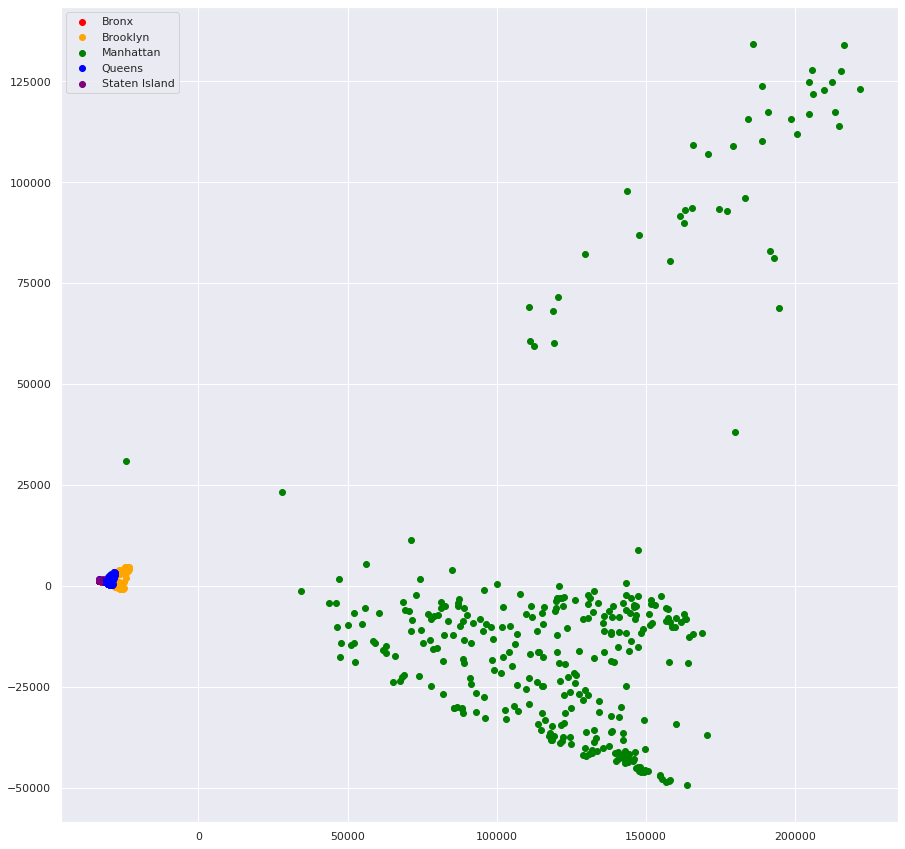

In [7]:
#showing low accuracies from the clustering point of view

#sets up and fits the PCA algorithm with 2 dimensions 
pca = PCA(n_components = 2)
s = pca.fit_transform(df)

#creating colour scheme with each colour below representing its respective class label
colours = ["red", "orange", "green", "blue", "purple"]
labels = boroughs

#plotting each class
for clas, colour, label in zip(np.unique(df["borough"]),colours,labels):
    plt.scatter(s[df["borough"]==clas, 0], s[df["borough"]==clas, 1], label=label, c=colour)
    
#printing the plot
plt.legend()
plt.show()


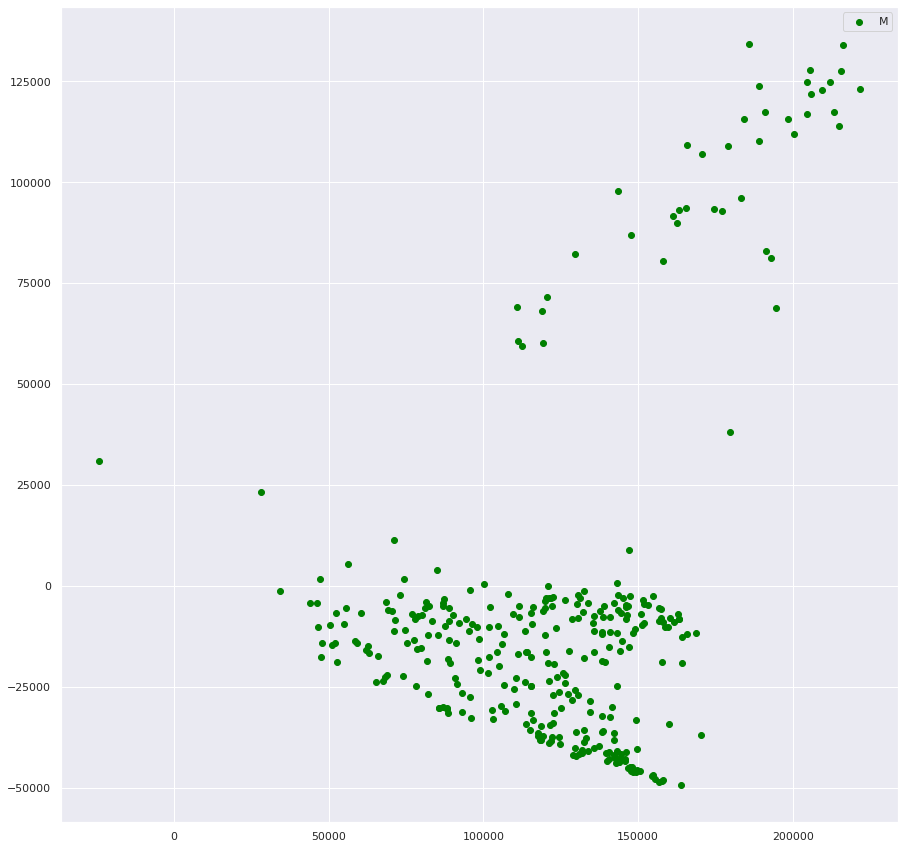

In [8]:
#showing low accuracies from the clustering point of view

df2 = df.loc[df["borough"] == 2]

#sets up and fits the PCA algorithm with 2 dimensions 
#pca = PCA(n_components = 2)
#s = pca.fit_transform(df2)

#creating colour scheme with each colour below representing its respective class label
colours = ["green"]
labels = boroughs[2]

#plotting each class
for clas, colour, label in zip(np.unique(df2["borough"]),colours,labels):
    plt.scatter(s[df["borough"]==clas, 0], s[df["borough"]==clas, 1], label=label, c=colour)
    
#printing the plot
plt.legend()
plt.show()


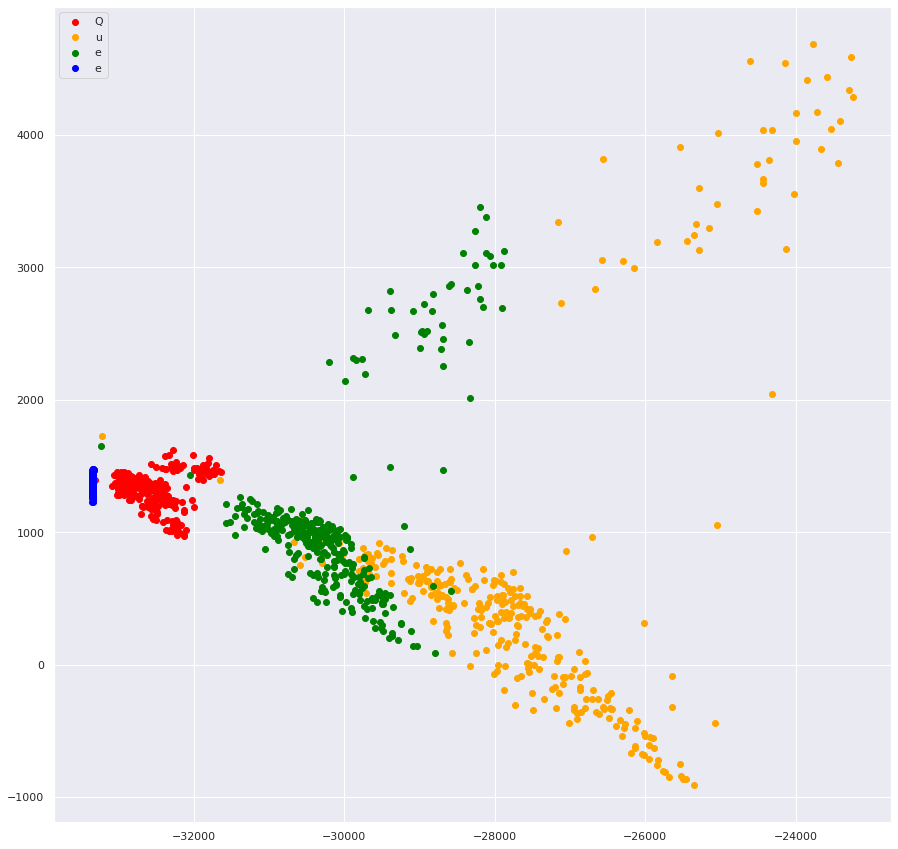

In [9]:
#showing low accuracies from the clustering point of view

df2 = df.loc[df["borough"] != 2]

#sets up and fits the PCA algorithm with 2 dimensions 
#pca = PCA(n_components = 2)
#s = pca.fit_transform(df2)

#creating colour scheme with each colour below representing its respective class label
colours = ["red", "orange", "green", "blue", "purple"]
labels = boroughs[-2]

#plotting each class
for clas, colour, label in zip(np.unique(df2["borough"]),colours,labels):
    plt.scatter(s[df["borough"]==clas, 0], s[df["borough"]==clas, 1], label=label, c=colour)
    
#printing the plot
plt.legend()
plt.show()

In [10]:
df.columns

Index(['Unnamed: 0', 'day_year', 'day_week', 'week', 'borough', 'fhv',
       '2019_night', '2019_morn', '2019_arvo', '2019_even', '2020_night',
       '2020_morn', '2020_arvo', '2020_even', 'total_case_count',
       'total_probable_case_count', 'total_hospitalized_count',
       'total_death_count', 'total_probable_death_count',
       'total_case_count_7day_avg', 'total_all_case_count_7day_avg',
       'total_hospitalized_count_7day_avg', 'total_death_count_7day_avg',
       'total_all_death_count_7day_avg', 'borough_case_count',
       'borough_probable_case_count', 'borough_hospitalized_count',
       'borough_death_count', 'borough_probable_death_count',
       'borough_case_count_7day_avg', 'borough_all_case_count_7day_avg',
       'borough_hospitalized_count_7day_avg', 'borough_death_count_7day_avg',
       'borough_all_death_count_7day_avg', 'pre_k_schools',
       'elementary_schools', 'middle_schools', 'high_schools', 'construction',
       'offices', 'phase_1', 'restaurants

In [11]:
df.corr()

,Unnamed: 0,day_year,day_week,week,borough,fhv,2019_night,2019_morn,2019_arvo,2019_even,...,phase_2,phase_3,phase_4,large_capacity_public,gatherings,broadway,movies,stadium_capcity,indoor_religious,curfew
Unnamed: 0,1.000000,9.999957e-01,-2.613274e-03,9.997802e-01,2.933521e-03,NaN,-0.024914,-0.039357,-0.031288,-0.035643,...,2.300853e-01,2.300853e-01,2.300853e-01,2.300853e-01,-5.799004e-01,-5.623645e-01,-5.623645e-01,-5.626411e-01,-8.739055e-02,6.076002e-01
day_year,0.999996,1.000000e+00,-2.613285e-03,9.997845e-01,1.675010e-16,NaN,-0.024880,-0.039334,-0.031263,-0.035613,...,2.300862e-01,2.300862e-01,2.300862e-01,2.300862e-01,-5.799029e-01,-5.623669e-01,-5.623669e-01,-5.626435e-01,-8.739093e-02,6.076028e-01
day_week,-0.002613,-2.613285e-03,1.000000e+00,-2.337326e-02,1.088365e-17,NaN,0.032732,0.022638,0.017377,0.060197,...,3.741013e-03,3.741013e-03,3.741013e-03,3.741013e-03,1.390068e-02,-1.216202e-02,-1.216202e-02,-1.209292e-02,-2.981925e-03,-2.424883e-03
week,0.999780,9.997845e-01,-2.337326e-02,1.000000e+00,1.635564e-16,NaN,-0.025553,-0.039794,-0.031615,-0.036853,...,2.299465e-01,2.299465e-01,2.299465e-01,2.299465e-01,-5.800350e-01,-5.619627e-01,-5.619627e-01,-5.622407e-01,-8.730545e-02,6.074892e-01
borough,0.002934,1.675010e-16,1.088365e-17,1.635564e-16,1.000000e+00,NaN,-0.011626,-0.007945,-0.008508,-0.010471,...,-1.508130e-16,-1.508130e-16,-1.508130e-16,-1.508130e-16,-2.136389e-16,-2.140274e-16,-2.140274e-16,-2.132815e-16,-2.007900e-16,-6.191039e-17
fhv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019_night,-0.024914,-2.488002e-02,3.273194e-02,-2.555284e-02,-1.162598e-02,NaN,1.000000,0.624776,0.779712,0.699756,...,1.179755e-02,1.179755e-02,1.179755e-02,1.179755e-02,2.489226e-02,2.022400e-02,2.022400e-02,2.027384e-02,2.289461e-02,-8.214334e-03
2019_morn,-0.039357,-3.933416e-02,2.263832e-02,-3.979353e-02,-7.944536e-03,NaN,0.624776,1.000000,0.969833,0.986747,...,1.381385e-02,1.381385e-02,1.381385e-02,1.381385e-02,3.378532e-02,3.022831e-02,3.022831e-02,3.023508e-02,2.128743e-02,-2.133491e-02
2019_arvo,-0.031288,-3.126281e-02,1.737698e-02,-3.161513e-02,-8.508466e-03,NaN,0.779712,0.969833,1.000000,0.983794,...,2.052847e-02,2.052847e-02,2.052847e-02,2.052847e-02,3.249824e-02,3.035032e-02,3.035032e-02,3.036508e-02,2.802296e-02,-6.424563e-03
2019_even,-0.035643,-3.561262e-02,6.019661e-02,-3.685273e-02,-1.047132e-02,NaN,0.699756,0.986747,0.983794,1.000000,...,1.664157e-02,1.664157e-02,1.664157e-02,1.664157e-02,3.284633e-02,2.619208e-02,2.619208e-02,2.621174e-02,2.251914e-02,-1.753610e-02


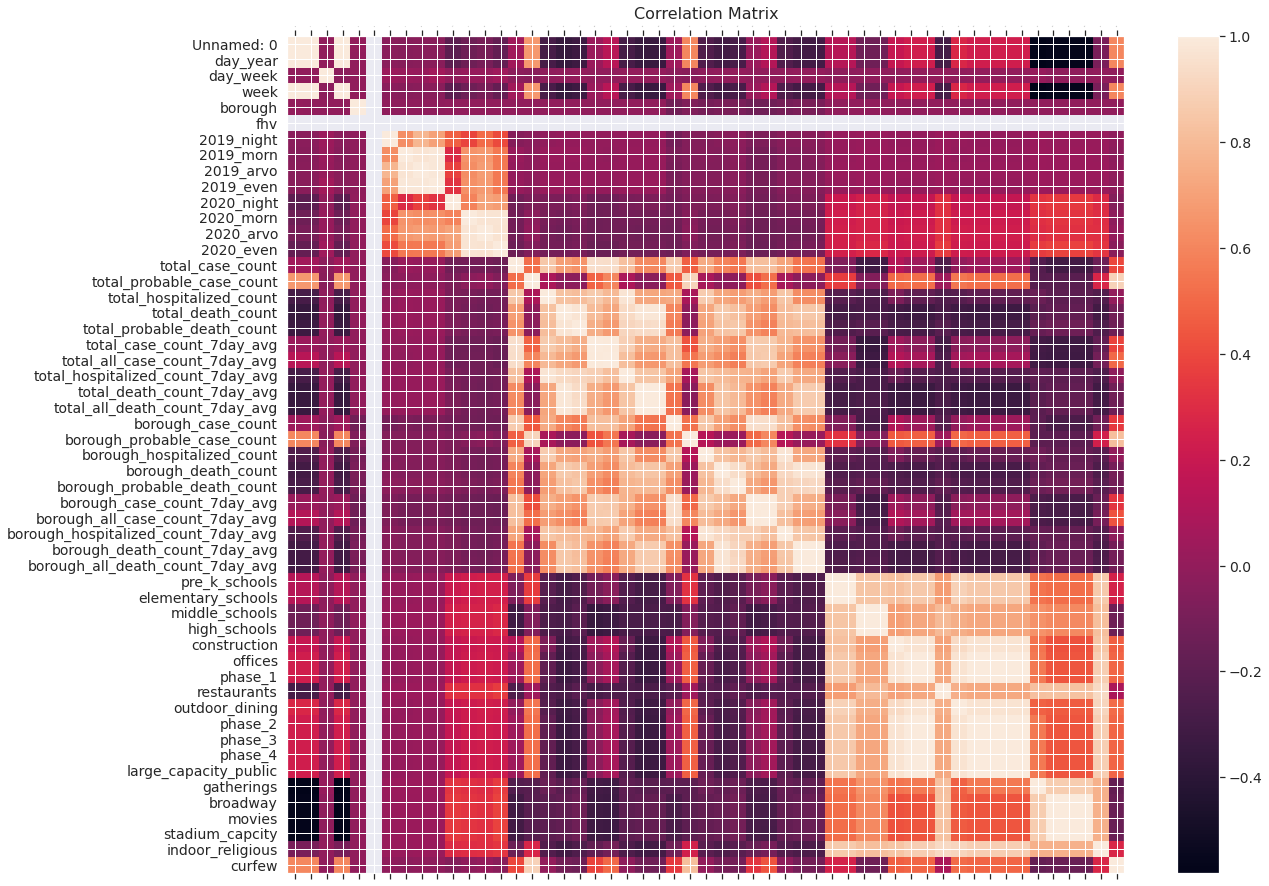

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

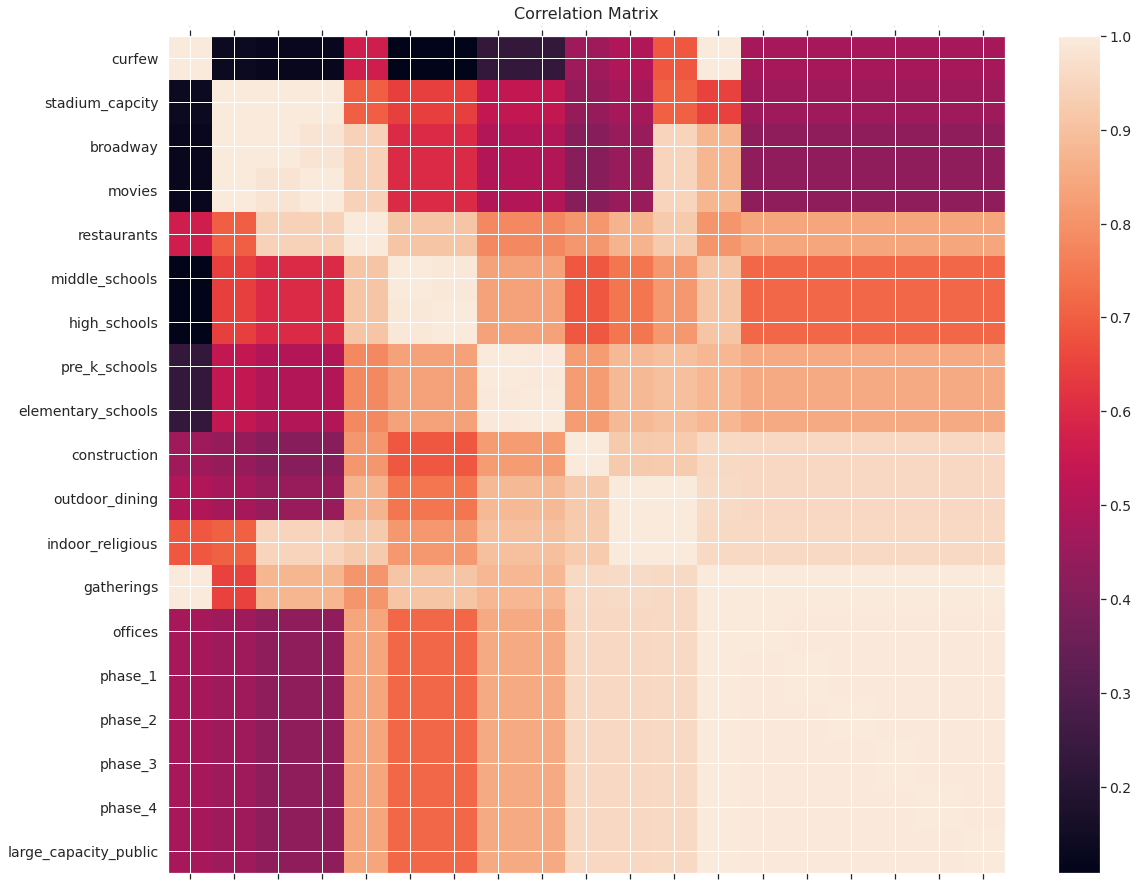

In [13]:
dft = df.loc[df["borough"] == 2]

#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    


covid_cols = [
            'curfew',
            'stadium_capcity', 
            'broadway', 
            'movies',
            'restaurants',
            'middle_schools',
            'high_schools', 
            'pre_k_schools', 
            'elementary_schools', 
            'construction', 
            'outdoor_dining', 
            'indoor_religious', 
            'gatherings', 
            'offices', 
            'phase_1', 
            'phase_2', 
            'phase_3', 
            'phase_4',
            'large_capacity_public'
]

dft[covid_cols]=(dft[covid_cols]-dft[covid_cols].min())/(dft[covid_cols].max()-dft[covid_cols].min())


dfs = dft[covid_cols]



f = plt.figure(figsize=(19, 15))
plt.matshow(dfs.corr(method=cramers_v), fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#curfew if its needed
#one from top 3-4
#one from next 2-3
#one of the schools
#one of construct - gath
#or one of construct to large capacity public

In [14]:

dfn = dft[covid_cols]
dfn=(dfn-dfn.min())/(dfn.max()-dfn.min())



<AxesSubplot:>

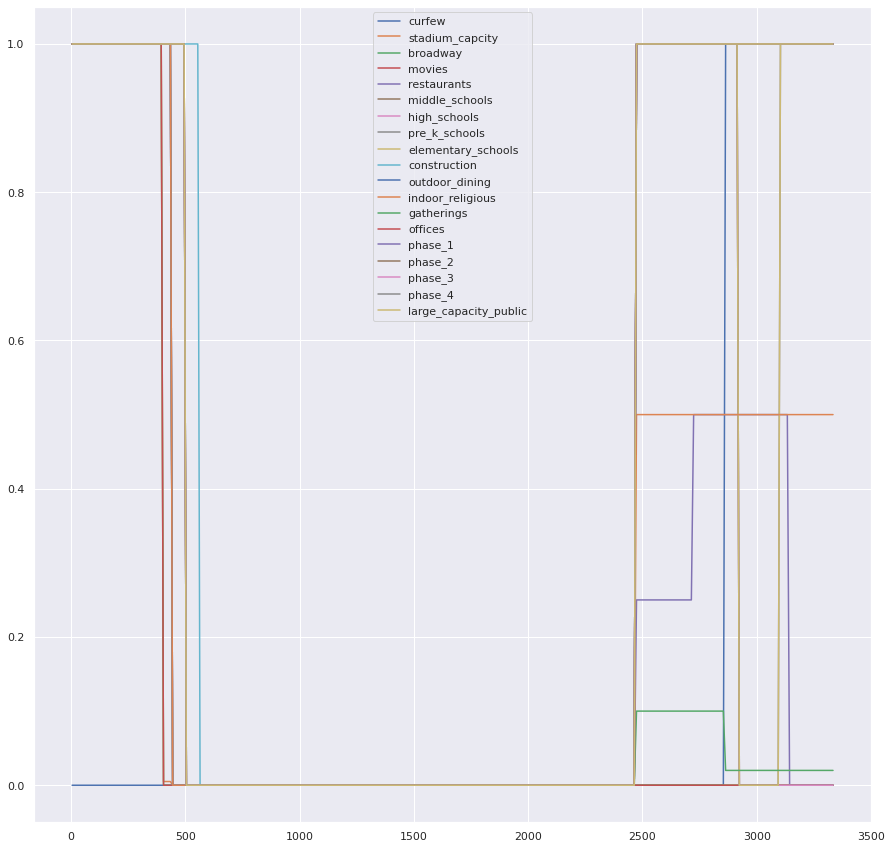

In [15]:
fig, ax = plt.subplots()
#xticks = (dft["week"]*(366/52) + dft["day"])
#lns1 = ax.plot(xticks, dft[["2020_morn"]], color = 'green', label = "2020_morn")


dft[covid_cols].plot(ax = ax)


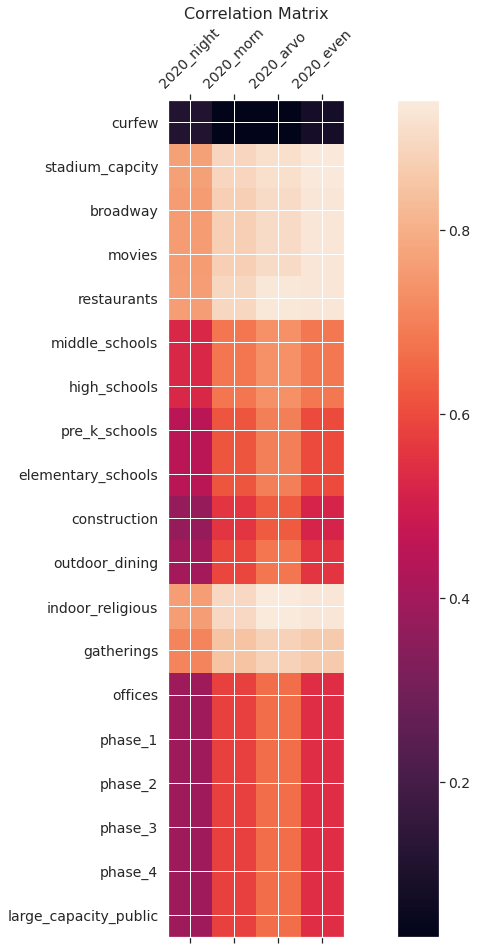

In [16]:
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

day_parts_2020 = ["2020_night","2020_morn","2020_arvo","2020_even"]
column_temp1 = covid_cols.copy()
column_temp1.extend(day_parts_2020)

dfs = dft[column_temp1].corr(method=correlation_ratio).drop(day_parts_2020)[day_parts_2020].abs()#[covid_cols, day_parts_2020]


f = plt.figure(figsize=(19, 15))
plt.matshow(dfs, fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#curfew if its needed
#its useless? tiny increase to 2020_night but nothing much

#one from top 3-4
#all quite good
#taking stadium_capcity

#one from next 2-3
#clearly restaurants

#one of the schools
#none very relavent

#one of construct - gath
#indoor religious seems to be slighlty better

#or one of construct to large capacity public
#all pretty much the same keep phase_1

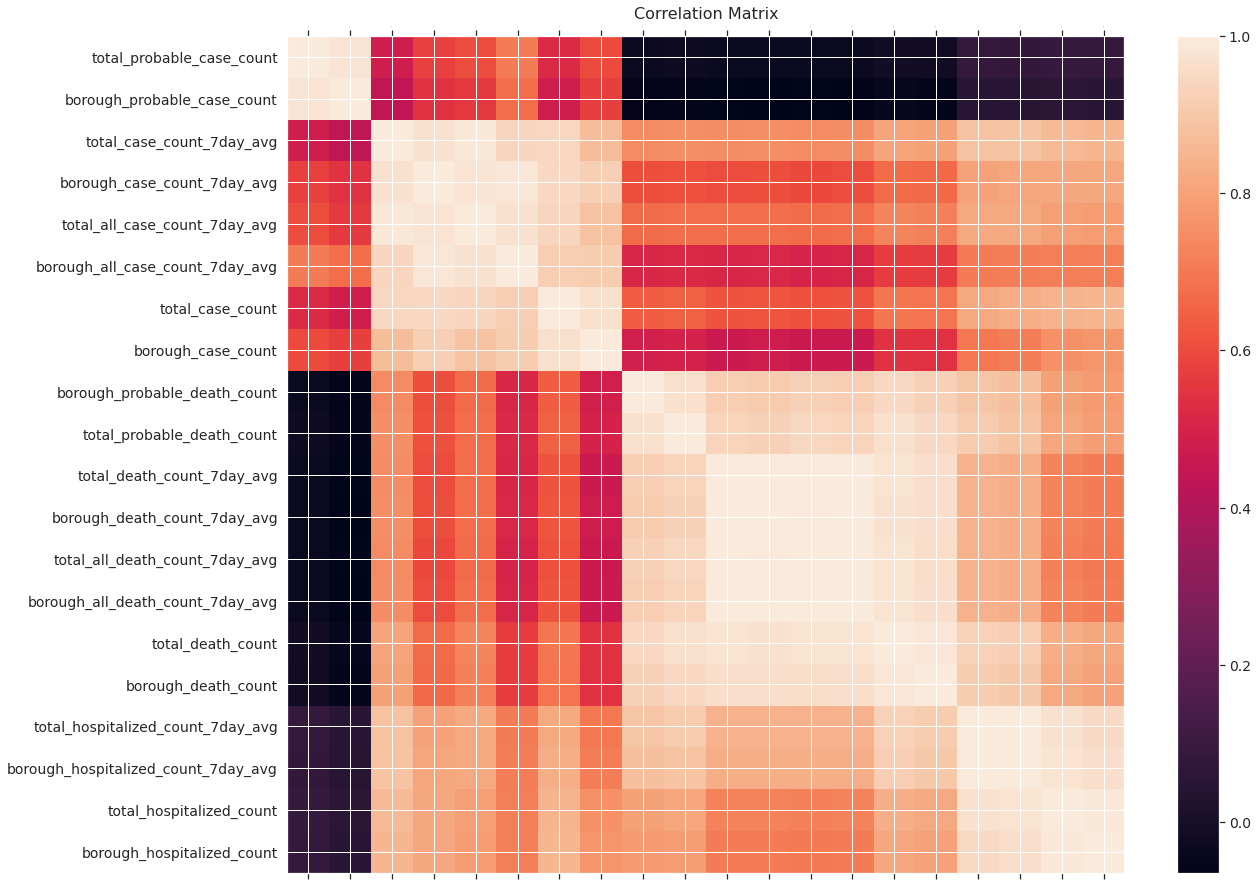

In [17]:
covid_cols = [
     'total_probable_case_count',
     'borough_probable_case_count',
    
     'total_case_count_7day_avg',
     'borough_case_count_7day_avg',
     'total_all_case_count_7day_avg', 
     'borough_all_case_count_7day_avg', 
     'total_case_count', 
     'borough_case_count', 

     'borough_probable_death_count',
     'total_probable_death_count',
     'total_death_count_7day_avg', 
     'borough_death_count_7day_avg', 
     'total_all_death_count_7day_avg',
     'borough_all_death_count_7day_avg',
     'total_death_count', 
     'borough_death_count', 
    
    
     'total_hospitalized_count_7day_avg',
     'borough_hospitalized_count_7day_avg',
     'total_hospitalized_count', 
     'borough_hospitalized_count', 
]

dfs = dft[covid_cols]




f = plt.figure(figsize=(19, 15))
plt.matshow(dfs.corr(), fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#one from first 2, one from next 6, one from next 8 and one from last 4

In [18]:
#correlation between taxi numbers in different boroughs
dfs.index

Int64Index([   4,   14,   24,   34,   44,   54,   64,   74,   84,   94,
            ...
            3244, 3254, 3264, 3274, 3284, 3294, 3304, 3314, 3324, 3334],
           dtype='int64', length=334)

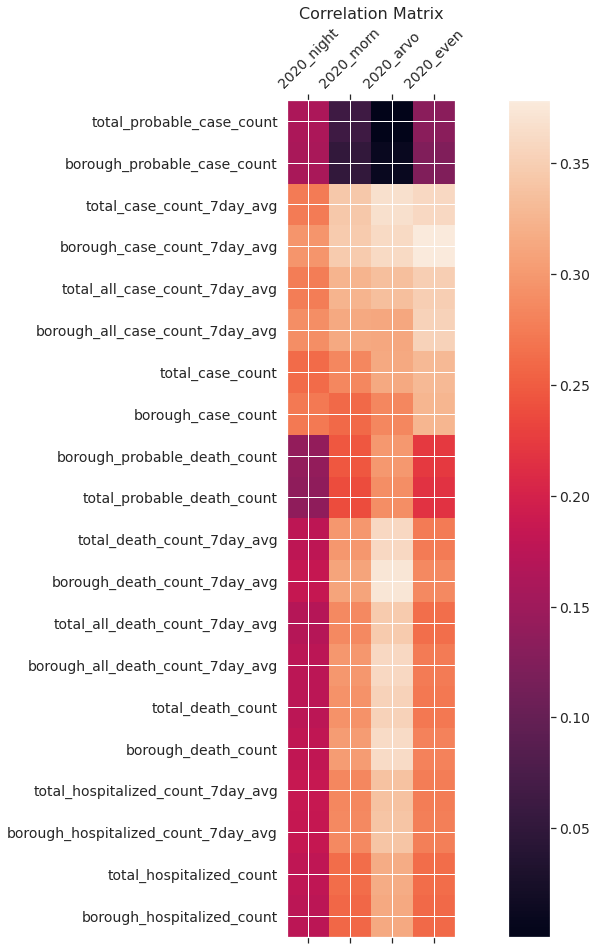

In [19]:
day_parts_2020 = ["2020_night","2020_morn","2020_arvo","2020_even"]
column_temp1 = covid_cols.copy()
column_temp1.extend(day_parts_2020)

dfs = dft[column_temp1].corr().drop(day_parts_2020)[day_parts_2020].abs()#[covid_cols, day_parts_2020]


f = plt.figure(figsize=(19, 15))
plt.matshow(dfs, fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#one from first 2, 
#niether both no correlation

#one from next 6, 
#borough_Case_count + 7day average
#compare it next

#one from next 8
#

#one from last 4

In [20]:
max_corr_delta = 0
max_corr = 0
max_corr_index = dfs.unstack().sort_values(ascending=False).index[0]
max_corr = dfs.unstack().sort_values(ascending=False)[0]

min_day_delta = -30
max_day_delta = 100
taxi_counts = dft[max_corr_index[0]]
covid_day0 = covid_cases["date_of_interest"][0]
day0 = dft["day_year"].values[0]

max_corr_index_use = [0,0]
if(max_corr_index[1].startswith('borough')):
    max_corr_index_use[0] = max_corr_index[0]
    max_corr_index_use[1] = "mn"+max_corr_index[1].split('borough')[1]
else:
    max_corr_index_use[0] = max_corr_index[0]
    max_corr_index_use[1] = max_corr_index[1].split('total_')[1]

    
    

for day_delta in range(min_day_delta, max_day_delta):
    
    values = []
    
    datetime0 = datetime.datetime.strptime( " ".join( [str(int) for int in [day0, covid_started[1]]]) ,"%j %Y" ) + datetime.timedelta(day_delta)
    #dft["day"].values
    
    for day_increment in range(0,len(dft)):
        day = datetime0 + datetime.timedelta(day_increment)

            
        val = covid_cases.loc[covid_cases['date_of_interest'] == day][max_corr_index_use[1]].values
        
        if(val.any()):
            values.append(val[0])
        else:
            values.append(0)
    r, p = pearsonr(values, taxi_counts)
    
    print(abs(r))
    
    if(abs(r) > max_corr):
        print("new high with " + str(max_corr))
        max_corr_delta = day_delta
        max_corr = abs(r)
    print(day_delta)

print(max_corr)
print(max_corr_delta)

0.3750961472419601
-30
0.3761510804143168
-29
0.37727630773868176
-28
0.3785154216733279
new high with 0.3784612836520923
-27
0.37975286675204895
new high with 0.3785154216733279
-26
0.3809348353546559
new high with 0.37975286675204895
-25
0.38213278999589173
new high with 0.3809348353546559
-24
0.3833743699647123
new high with 0.38213278999589173
-23
0.3846416912397679
new high with 0.3833743699647123
-22
0.3856643487907132
new high with 0.3846416912397679
-21
0.38649802981220804
new high with 0.3856643487907132
-20
0.3875831906930591
new high with 0.38649802981220804
-19
0.388601595978184
new high with 0.3875831906930591
-18
0.38949813625742086
new high with 0.388601595978184
-17
0.3902756613016699
new high with 0.38949813625742086
-16
0.39086456100718653
new high with 0.3902756613016699
-15
0.3915380762159383
new high with 0.39086456100718653
-14
0.39247473018716217
new high with 0.3915380762159383
-13
0.3929152398827019
new high with 0.39247473018716217
-12
0.39309661607467666
new 

In [21]:
print(max_corr_delta)
print(max_corr_index_use)


46
['2020_even', 'mn_case_count_7day_avg']


In [22]:
datetime0 = day0

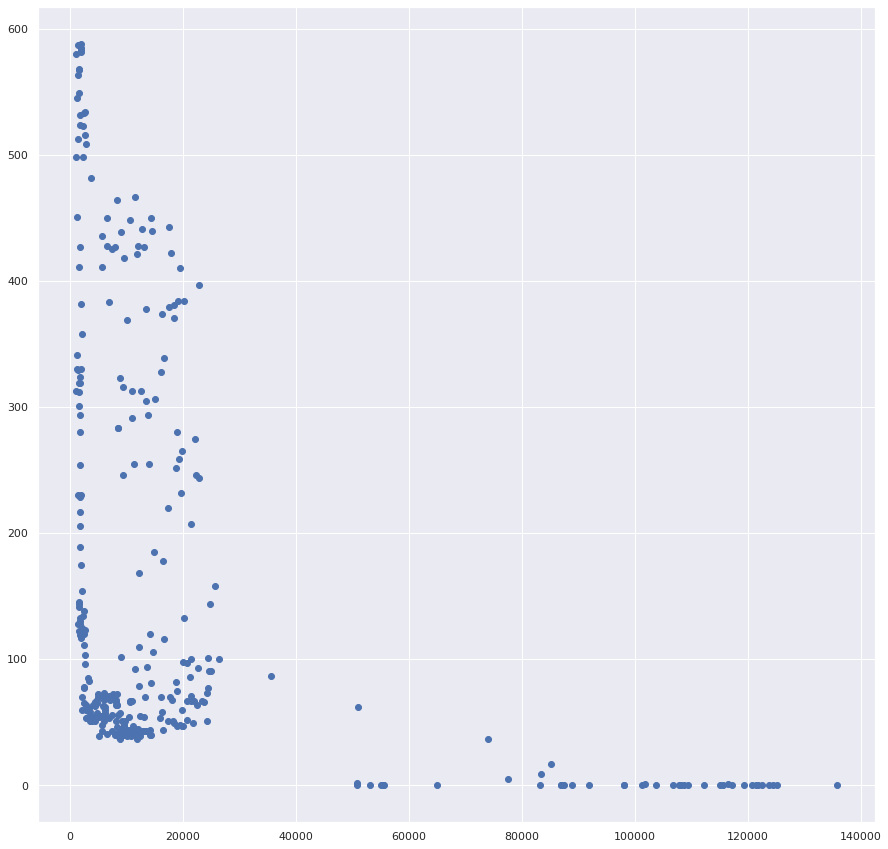

In [23]:
# Fixing random state for reproducibility
np.random.seed(19680801)

#N = 50
x = dft[max_corr_index[0]]
y = dft[max_corr_index[1]]
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y)#, c=colors, alpha=0.5)
plt.show()

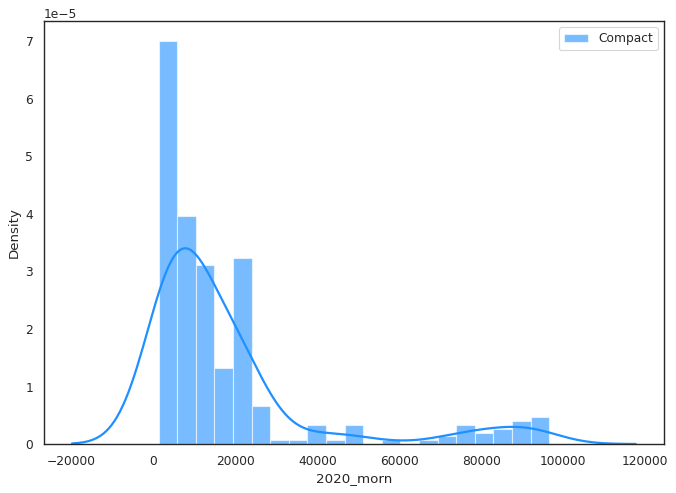

In [24]:
import seaborn as sns
sns.set_style("white")

# Import data
x1 = dft["2020_morn"]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
#plt.xlim(50,75)
plt.legend();

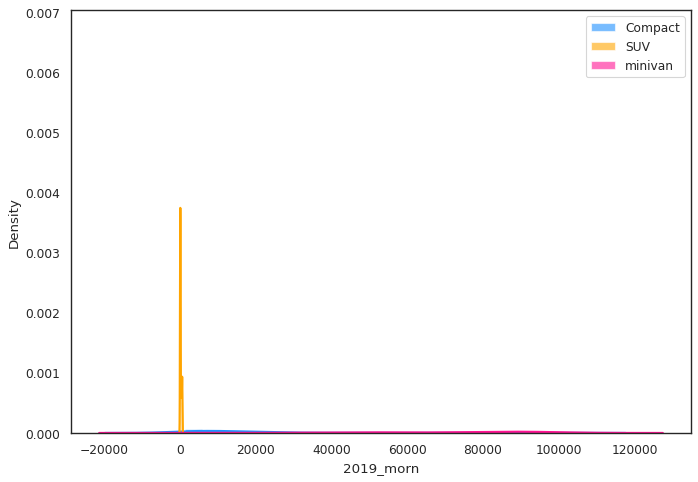

In [25]:
import seaborn as sns
sns.set_style("white")

# Import data
x1 = dft["2020_morn"]
x2 = dft["borough_all_case_count_7day_avg"]
x3 = dft["2019_morn"]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
sns.distplot(x2, color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
#plt.xlim(50,75)
plt.legend();

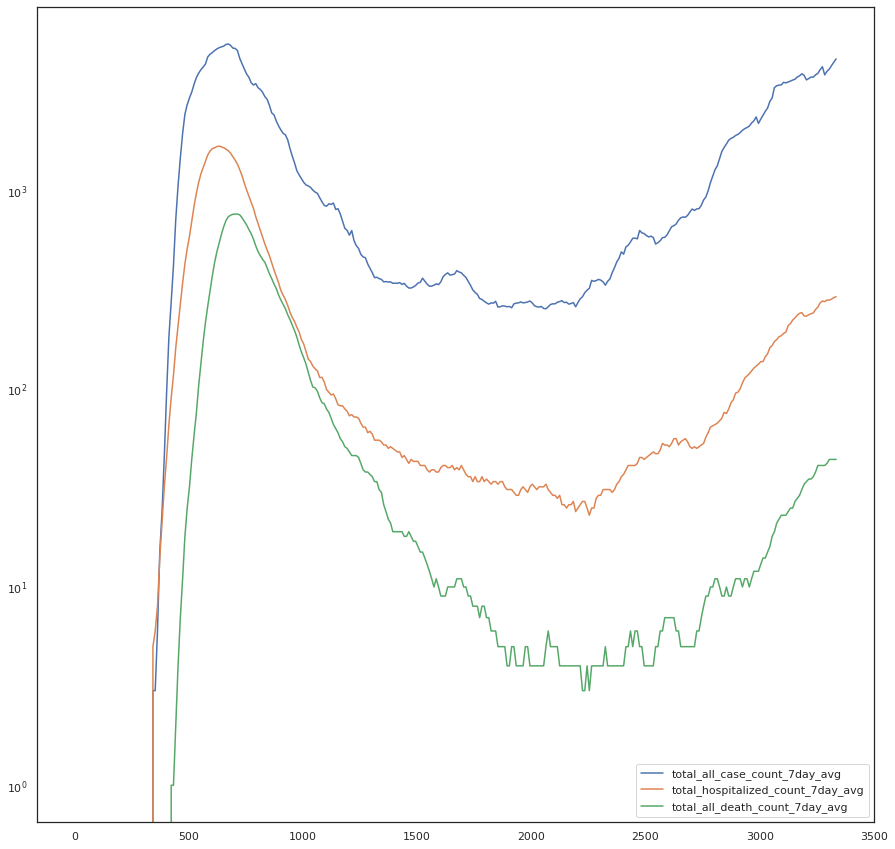

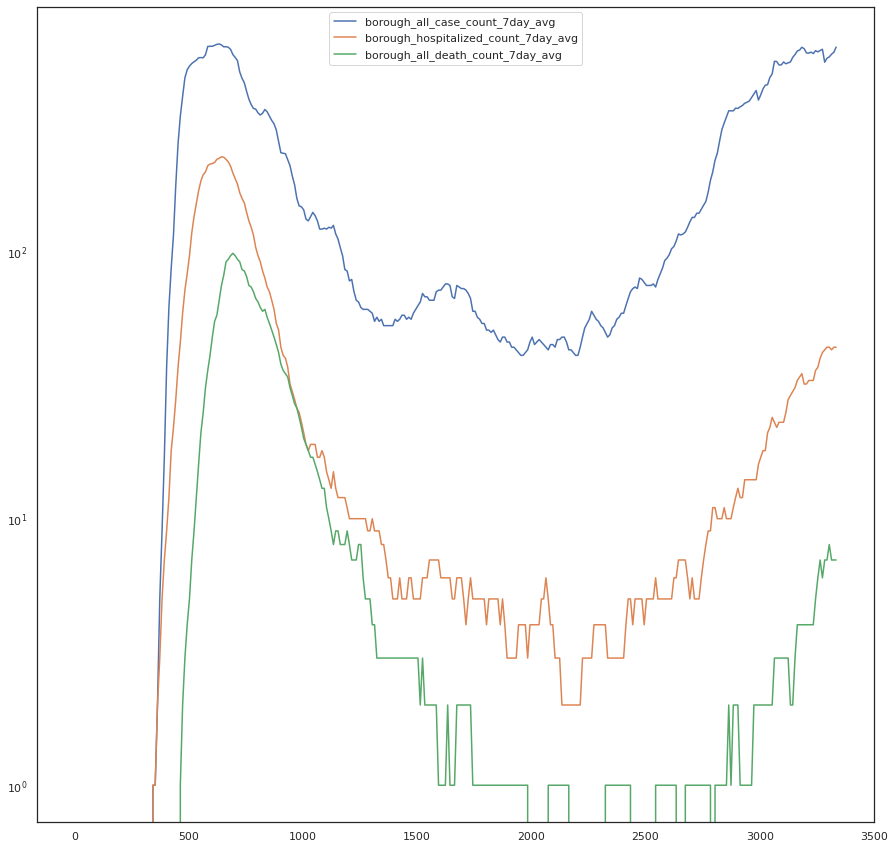

In [26]:
fig, ax = plt.subplots()
#xticks = (dft["week"]*(366/52) + dft["day"])
#lns1 = ax.plot(xticks, dft[["2020_morn"]], color = 'green', label = "2020_morn")


dft[[
     'total_all_case_count_7day_avg', 
     'total_hospitalized_count_7day_avg',
     'total_all_death_count_7day_avg',
]].plot(ax = ax)


ax.set_yscale('log')

fig2, ax2 = plt.subplots()
dft[[
     'borough_all_case_count_7day_avg', 
     'borough_hospitalized_count_7day_avg',
     'borough_all_death_count_7day_avg'
        ]].plot(ax = ax2)
ax2.set_yscale('log')





In [27]:
dft

,Unnamed: 0,day_year,day_week,week,borough,fhv,2019_night,2019_morn,2019_arvo,2019_even,...,phase_2,phase_3,phase_4,large_capacity_public,gatherings,broadway,movies,stadium_capcity,indoor_religious,curfew
4,4,32,6,4,2,0,46401,61293,113616,113702,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
14,14,33,0,5,2,0,55188,48120,97169,73240,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
24,24,34,1,5,2,0,10238,87105,93468,100421,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
34,34,35,2,5,2,0,11333,96516,101806,119016,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
44,44,36,3,5,2,0,15254,102070,110476,139430,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3294,361,6,51,2,0,21429,29171,63555,59576,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3304,3304,362,0,52,2,0,27110,25191,62766,50039,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3314,3314,363,1,52,2,0,10122,45975,75511,55592,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3324,3324,364,2,52,2,0,12736,38494,66496,68564,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

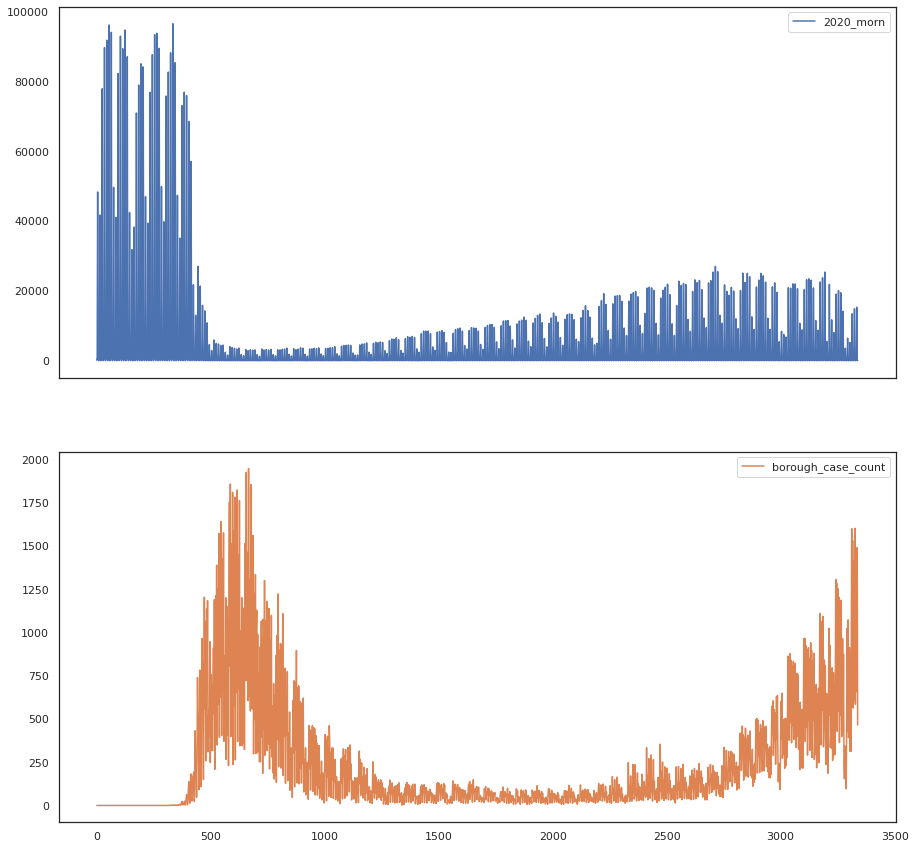

In [28]:
df[["2020_morn","borough_case_count"]].plot(subplots=True)

In [29]:
def compare_these_cols(graphing_cols):
    fig, ax = plt.subplots()
    xticks = (dft["day_year"])
    
    ax.set_xticklabels = xticks
    ax.set_xticks = xticks
    
    lns1 = ax.plot(xticks, dft[[graphing_cols[0]]], color = 'green', label = graphing_cols[0])
    ax.set_yscale('log')
    ax.tick_params(axis='y', labelcolor='green')
    
    ax2 = ax.twinx()
    lns2 = ax2.plot(xticks, dft[[graphing_cols[1]]], color = 'blue', label = graphing_cols[1])
    ax2.set_yscale('log')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    lns = lns1 + lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)

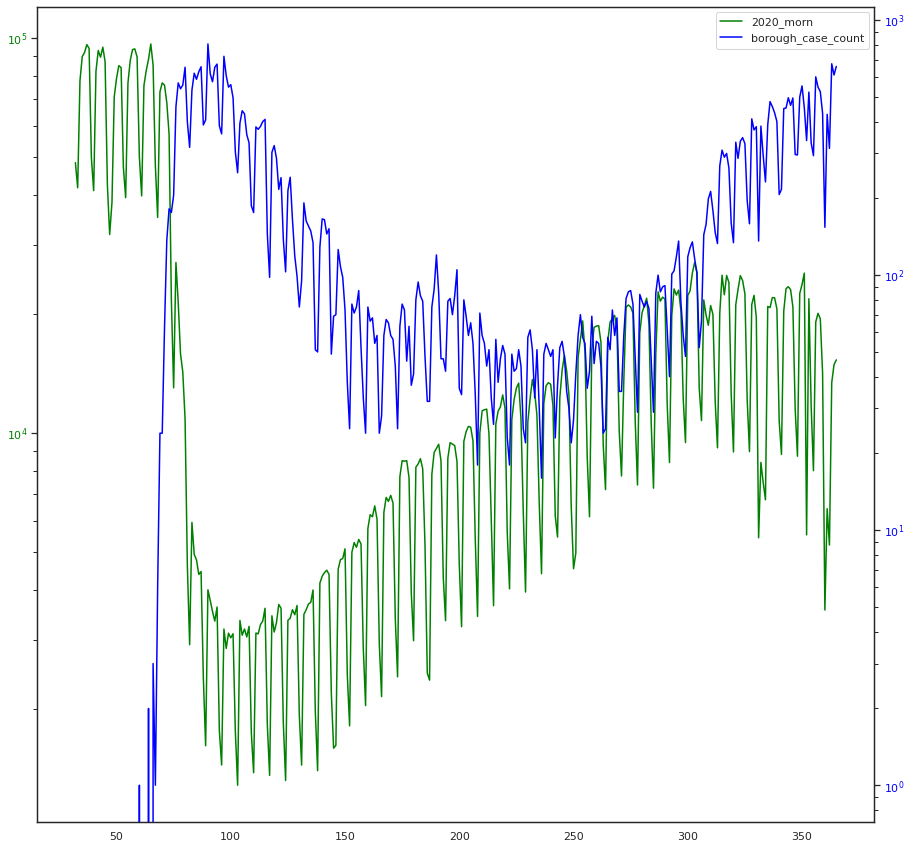

In [30]:
compare_these_cols(["2020_morn","borough_case_count"])

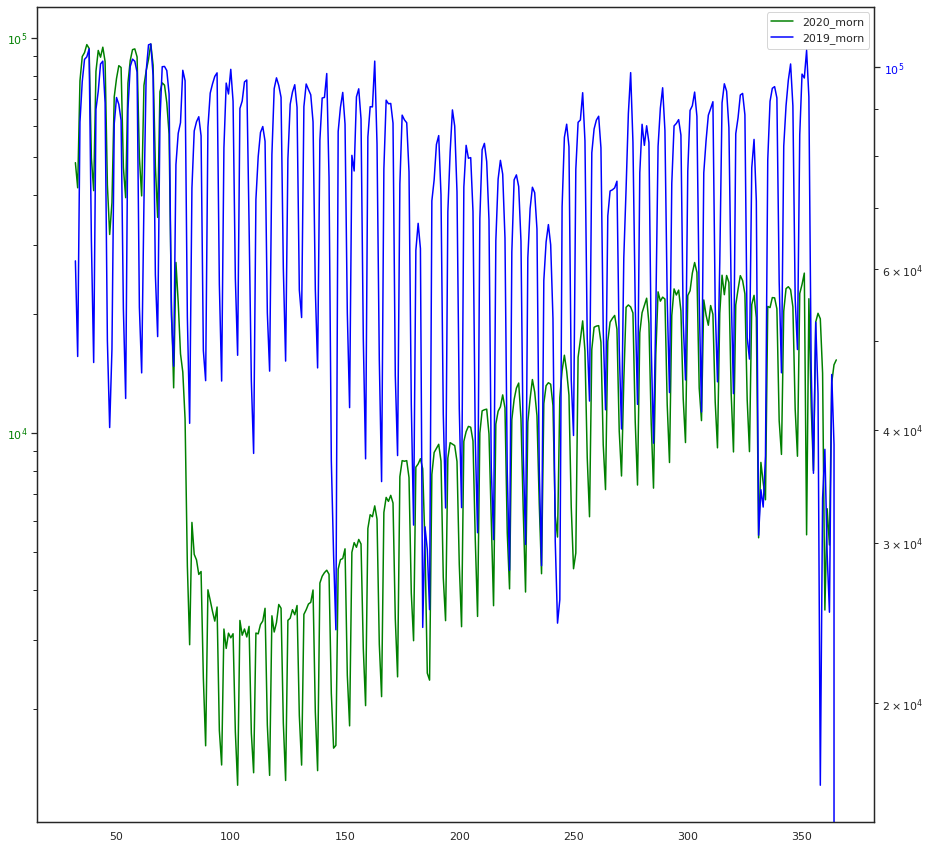

In [31]:
compare_these_cols(["2020_morn","2019_morn"])


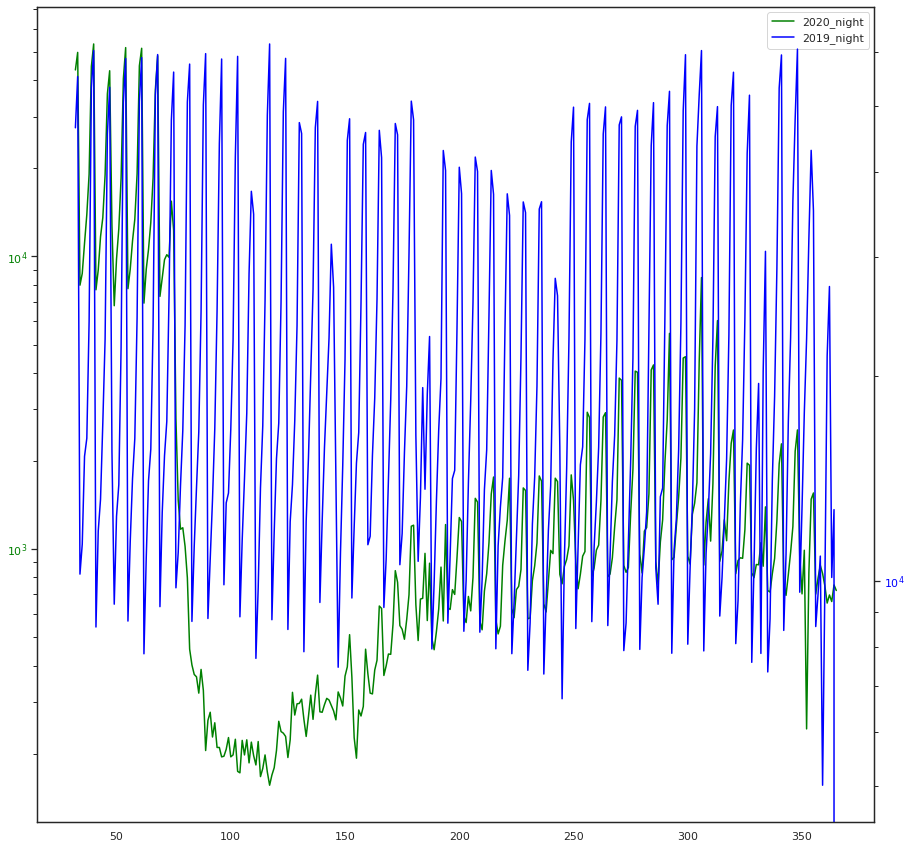

In [32]:
compare_these_cols(["2020_night","2019_night"])

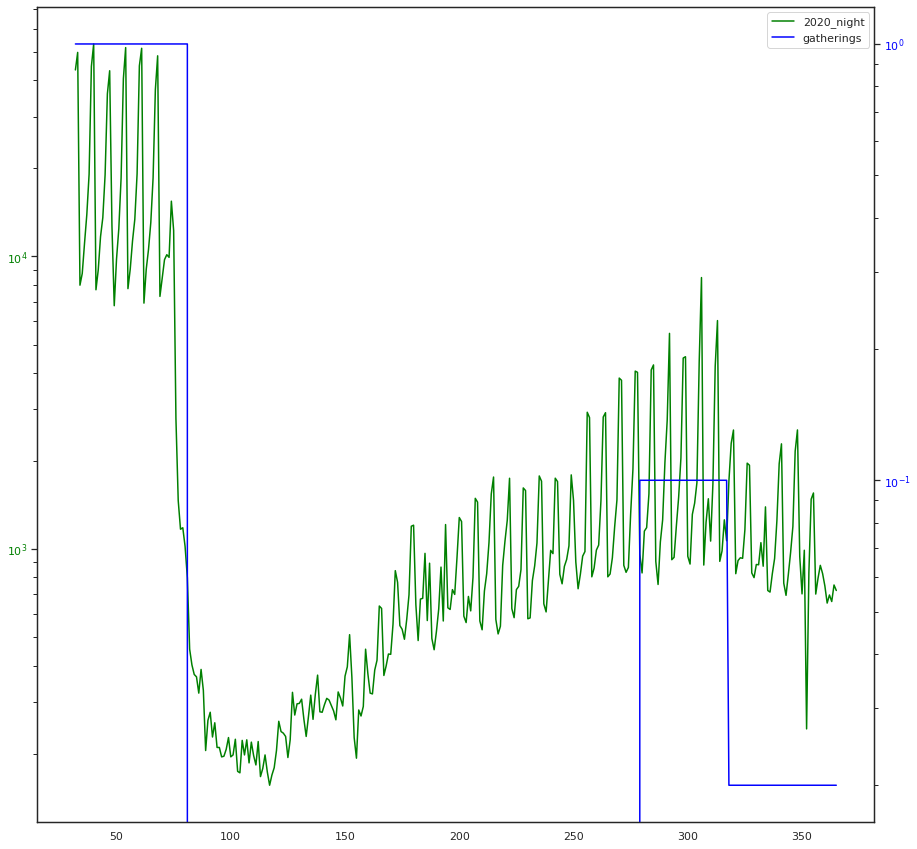

In [33]:
compare_these_cols(["2020_night",'gatherings'])

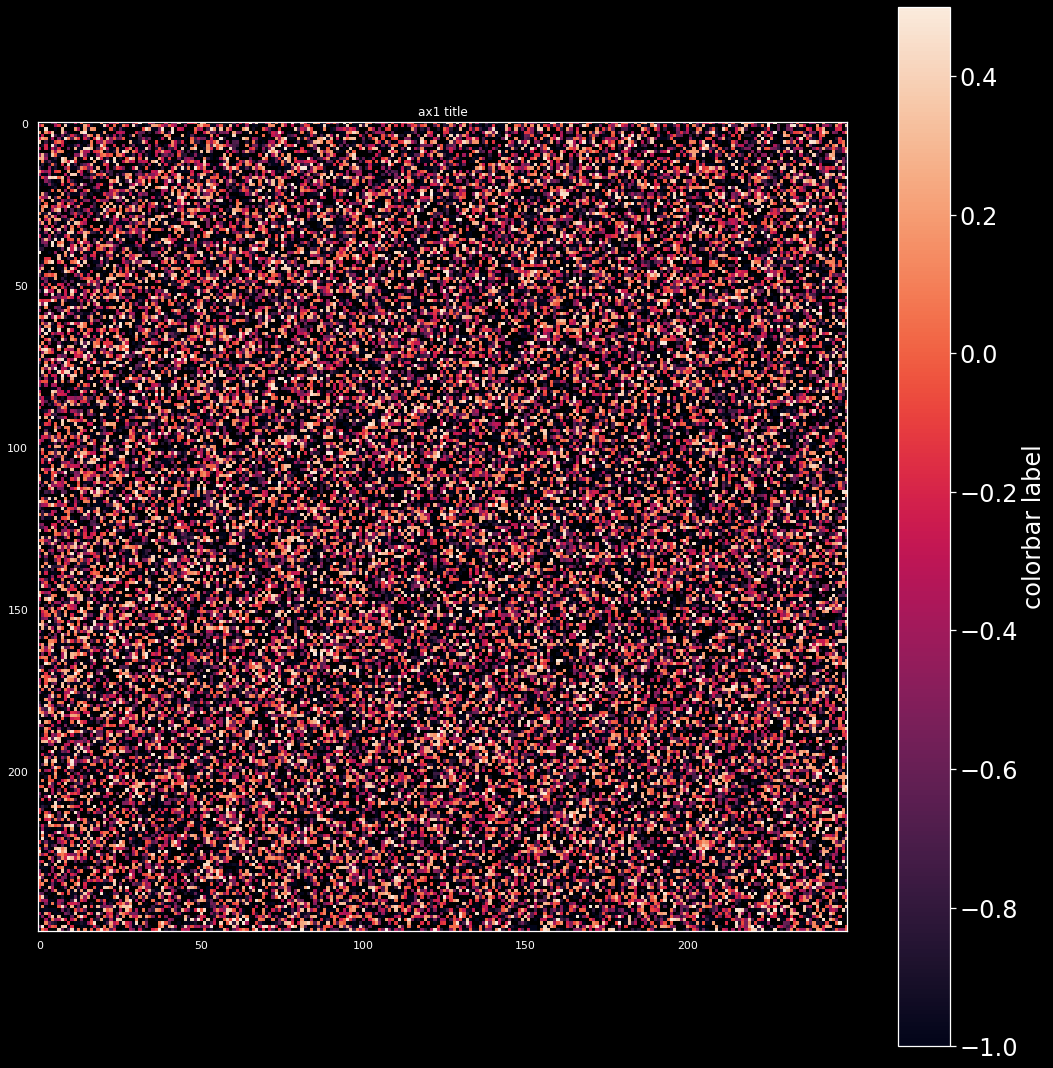

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
data = np.clip(randn(250,250),-1,1)
data = np.ma.masked_where(data > 0.5, data)


fig, ax1 = plt.subplots(1,1)

im = ax1.imshow(data, interpolation='nearest')
cb = plt.colorbar(im)

fg_color = 'white'
bg_color = 'black'

# IMSHOW    
# set title plus title color
ax1.set_title('ax1 title', color=fg_color)

# set figure facecolor
ax1.patch.set_facecolor(bg_color)

# set tick and ticklabel color
im.axes.tick_params(color=fg_color, labelcolor=fg_color)

# set imshow outline
for spine in im.axes.spines.values():
    spine.set_edgecolor(fg_color)    

# COLORBAR
# set colorbar label plus label color
cb.set_label('colorbar label', color=fg_color, fontsize=24)
cb.ax.tick_params(labelsize=24)
# set colorbar tick color
cb.ax.yaxis.set_tick_params(color=fg_color)

# set colorbar edgecolor 
cb.outline.set_edgecolor(fg_color)

# set colorbar ticklabels
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fg_color)

fig.patch.set_facecolor(bg_color)    
plt.tight_layout()
plt.show()
#plt.savefig('save/to/pic.png', dpi=200, facecolor=bg_color)